Loading data...
Total samples: 9654, Feature size: 400, Number of classes: 41
Training samples: 7723, Testing samples: 1931

Evaluating K-NN with different K values and Euclidean distance...
K=1, Metric=euclidean, Weighted=False, Accuracy=0.9845
K=2, Metric=euclidean, Weighted=False, Accuracy=0.9767
K=3, Metric=euclidean, Weighted=False, Accuracy=0.9793
K=4, Metric=euclidean, Weighted=False, Accuracy=0.9736
K=5, Metric=euclidean, Weighted=False, Accuracy=0.9762
K=6, Metric=euclidean, Weighted=False, Accuracy=0.9705
K=7, Metric=euclidean, Weighted=False, Accuracy=0.9720
K=8, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=9, Metric=euclidean, Weighted=False, Accuracy=0.9710
K=10, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=11, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=12, Metric=euclidean, Weighted=False, Accuracy=0.9679
K=13, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=14, Metric=euclidean, Weighted=False, Accuracy=0.9669
K=15, Metric=euclidean, Weighted=F

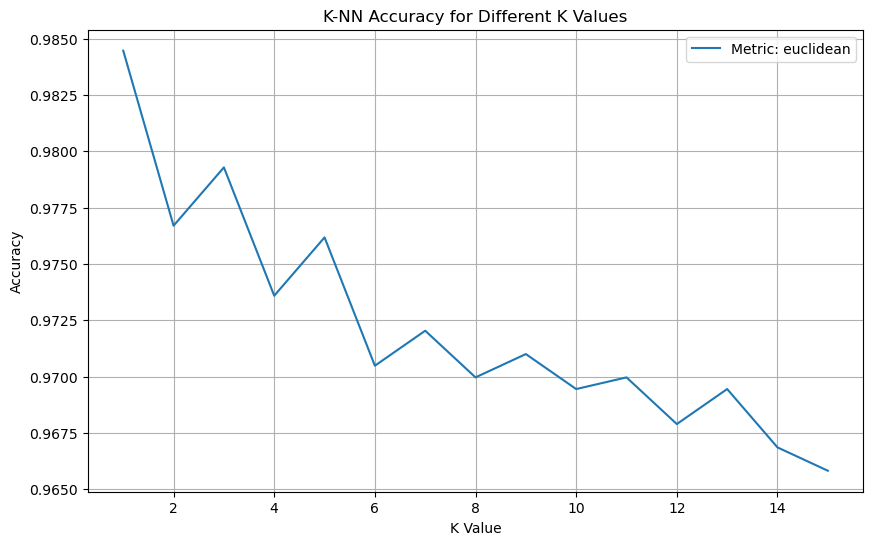


Evaluating K-NN with different distance metrics...
K=1, Metric=euclidean, Weighted=False, Accuracy=0.9845
K=2, Metric=euclidean, Weighted=False, Accuracy=0.9767
K=3, Metric=euclidean, Weighted=False, Accuracy=0.9793
K=4, Metric=euclidean, Weighted=False, Accuracy=0.9736
K=5, Metric=euclidean, Weighted=False, Accuracy=0.9762
K=6, Metric=euclidean, Weighted=False, Accuracy=0.9705
K=7, Metric=euclidean, Weighted=False, Accuracy=0.9720
K=8, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=9, Metric=euclidean, Weighted=False, Accuracy=0.9710
K=10, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=11, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=12, Metric=euclidean, Weighted=False, Accuracy=0.9679
K=13, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=14, Metric=euclidean, Weighted=False, Accuracy=0.9669
K=15, Metric=euclidean, Weighted=False, Accuracy=0.9658
K=1, Metric=manhattan, Weighted=False, Accuracy=0.9782
K=2, Metric=manhattan, Weighted=False, Accuracy=0.9637
K=3, Me

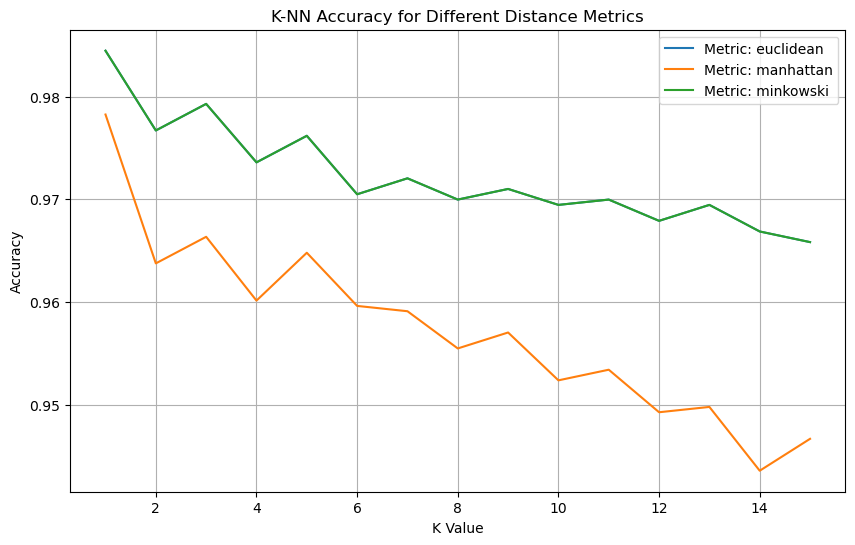


Evaluating K-NN with weighted and unweighted approaches...
K=1, Metric=euclidean, Weighted=False, Accuracy=0.9845
K=2, Metric=euclidean, Weighted=False, Accuracy=0.9767
K=3, Metric=euclidean, Weighted=False, Accuracy=0.9793
K=4, Metric=euclidean, Weighted=False, Accuracy=0.9736
K=5, Metric=euclidean, Weighted=False, Accuracy=0.9762
K=6, Metric=euclidean, Weighted=False, Accuracy=0.9705
K=7, Metric=euclidean, Weighted=False, Accuracy=0.9720
K=8, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=9, Metric=euclidean, Weighted=False, Accuracy=0.9710
K=10, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=11, Metric=euclidean, Weighted=False, Accuracy=0.9700
K=12, Metric=euclidean, Weighted=False, Accuracy=0.9679
K=13, Metric=euclidean, Weighted=False, Accuracy=0.9694
K=14, Metric=euclidean, Weighted=False, Accuracy=0.9669
K=15, Metric=euclidean, Weighted=False, Accuracy=0.9658
K=1, Metric=euclidean, Weighted=True, Accuracy=0.9845
K=2, Metric=euclidean, Weighted=True, Accuracy=0.9845
K

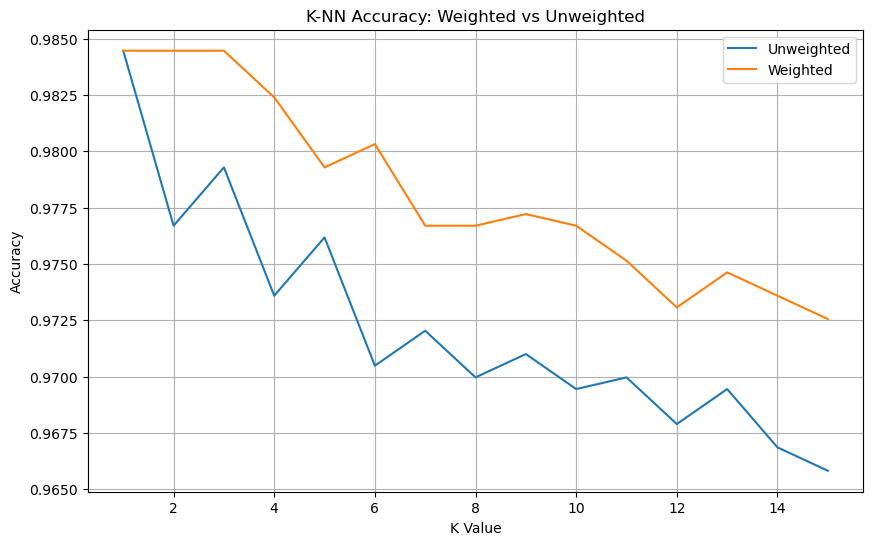


Analyzing the effect of training set size on accuracy...
Training size: 10%, Accuracy: 0.9021
Training size: 20%, Accuracy: 0.9404
Training size: 30%, Accuracy: 0.9456
Training size: 40%, Accuracy: 0.9565
Training size: 50%, Accuracy: 0.9637
Training size: 59%, Accuracy: 0.9700
Training size: 69%, Accuracy: 0.9720
Training size: 79%, Accuracy: 0.9705
Training size: 89%, Accuracy: 0.9741
Training size: 99%, Accuracy: 0.9751


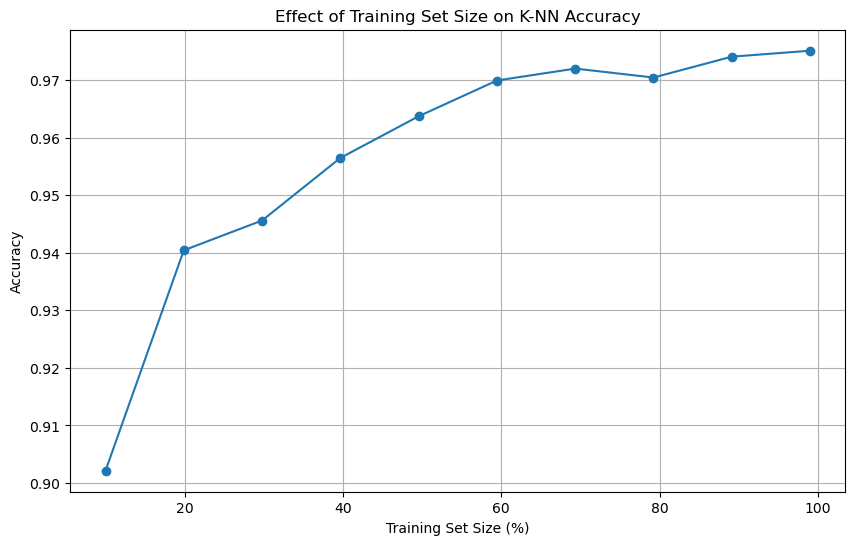


项目完成。以上分析展示了K-NN算法在不同参数设置下的性能表现，为车牌字符识别任务提供了有效的参考。


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 设置随机种子以确保结果可复现
np.random.seed(42)

# 数据路径，假设数据按类别存放在每个子文件夹中
DATA_DIR = 'train'  


def load_data(data_dir):
    """
    读取图像数据并转换为特征向量
    :param data_dir: 数据集根目录
    :return: 图像特征向量和对应标签
    """
    X = []
    y = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if not os.path.isdir(label_dir):
            continue
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            # 读取图像为灰度图
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            # 图像预处理，如统一大小
            img = cv2.resize(img, (20, 20))
            # 展平成一维向量
            img_vector = img.flatten()
            X.append(img_vector)
            y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

# 加载数据
print("Loading data...")
X, y = load_data(DATA_DIR)
print(f"Total samples: {X.shape[0]}, Feature size: {X.shape[1]}, Number of classes: {len(np.unique(y))}")

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

def evaluate_knn(k_values, distance_metrics, weighted=False):
    """
    评估不同K值和距离度量方式下K-NN的准确率
    :param k_values: K的取值列表
    :param distance_metrics: 距离度量方式列表
    :param weighted: 是否使用加权K-NN
    """
    results = {}
    for metric in distance_metrics:
        accuracies = []
        for k in k_values:
            if weighted:
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
            else:
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)
            print(f"K={k}, Metric={metric}, Weighted={weighted}, Accuracy={acc:.4f}")
        results[metric] = accuracies
    return results

# 基本要求：不同K值下的准确率分析
print("\nEvaluating K-NN with different K values and Euclidean distance...")
k_values = list(range(1, 16))
distance_metrics = ['euclidean']
results_basic = evaluate_knn(k_values, distance_metrics, weighted=False)

# 绘制K与准确率关系图
plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, results_basic[metric], label=f"Metric: {metric}")
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy for Different K Values')
plt.legend()
plt.grid(True)
plt.show()

# 扩展要求1：不同距离度量方式对模型效果的影响
print("\nEvaluating K-NN with different distance metrics...")
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
results_distance = evaluate_knn(k_values, distance_metrics, weighted=False)

# 绘制不同距离度量下K与准确率关系图
plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, results_distance[metric], label=f"Metric: {metric}")
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy for Different Distance Metrics')
plt.legend()
plt.grid(True)
plt.show()

# 扩展要求2：平权与加权K-NN效果对比
print("\nEvaluating K-NN with weighted and unweighted approaches...")
weighted = False
results_unweighted = evaluate_knn(k_values, ['euclidean'], weighted=weighted)
weighted = True
results_weighted = evaluate_knn(k_values, ['euclidean'], weighted=weighted)

# 绘制加权与不加权下K与准确率关系图
plt.figure(figsize=(10, 6))
plt.plot(k_values, results_unweighted['euclidean'], label="Unweighted")
plt.plot(k_values, results_weighted['euclidean'], label="Weighted")
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K-NN Accuracy: Weighted vs Unweighted')
plt.legend()
plt.grid(True)
plt.show()

# 扩展要求3：训练集大小对测试结果的影响
print("\nAnalyzing the effect of training set size on accuracy...")
train_sizes = np.linspace(0.1, 0.99, 10)
accuracy_train_size = []
for size in train_sizes:
    X_tr, _, y_tr, _ = train_test_split(X_train, y_train, train_size=size, stratify=y_train, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_tr, y_tr)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_train_size.append(acc)
    print(f"Training size: {size*100:.0f}%, Accuracy: {acc:.4f}")

# 绘制训练集大小与准确率关系图
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, accuracy_train_size, marker='o')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Effect of Training Set Size on K-NN Accuracy')
plt.grid(True)
plt.show()

# 总结
print("\n项目完成。以上分析展示了K-NN算法在不同参数设置下的性能表现，为车牌字符识别任务提供了有效的参考。")

